In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
caminho_bases = pathlib.Path('archive')
base_airbnb = pd.DataFrame()
meses = {'jan' : 1, 'fev' : 2, 'mar' : 3, 'abr' : 4, 'mai' : 5, 'jun' : 6, 'jul' : 7, 'ago' : 8, 'set' : 9, 'out': 10, 'nov' : 11, 'dez' : 12}


for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))
    
    df = pd.read_csv(caminho_bases / arquivo.name)
    
    df['ano'] = ano
    df['mes'] = mes

    base_airbnb = base_airbnb._append(df)



/var/folders/qz/y6_hsdhd6gsbs7nck_9v8f8r0000gn/T/ipykernel_1009/4254408390.py:12: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
/var/folders/qz/y6_hsdhd6gsbs7nck_9v8f8r0000gn/T/ipykernel_1009/4254408390.py:12: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
/var/folders/qz/y6_hsdhd6gsbs7nck_9v8f8r0000gn/T/ipykernel_1009/4254408390.py:12: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
/var/folders/qz/y6_hsdhd6gsbs7nck_9v8f8r0000gn/T/ipykernel_1009/4254408390.py:12: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
/var/folders/qz/y6_hsdhd6gsbs7nck_9v8f8r0000gn/T/ipyke

- Temos muitas colunas, então vou analisar para usar apenas as colunas necessárias para a previsão dos preços.

- Para isso, vou criar um arquivo em excel com os 1000 primeiros registros e fazer uma analise qualitativa.

- Tipos de informações que eu vou excluir:
-IDS, Links, Informações não relevantes
-Colunas repetidadas ou extremamente parecidas com outras (que dão a mesma informação para o modelo)
-Colunas preenchidas com texto livre (não irá ser rodado nenhuma análise de texto)
-Coluna em que todos ou quase todos os valores são iguais


In [3]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,within an hour,100%,t,2.0,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2020,1
1,within an hour,100%,f,0.0,-22.98467,-43.19611,Apartment,Entire home/apt,6,2.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2020,1
2,within a day,86%,f,3.0,-22.97712,-43.19045,Apartment,Entire home/apt,2,1.0,...,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2020,1
3,within an hour,100%,t,1.0,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2020,1
4,within an hour,100%,f,1.0,-22.98816,-43.19359,Apartment,Entire home/apt,2,1.5,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36373,NaN,NaN,f,1.0,-23.02612,-43.46498,Condominium,Entire home/apt,6,2.5,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36374,NaN,NaN,f,1.0,-23.01049,-43.36381,Apartment,Entire home/apt,6,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36375,NaN,NaN,f,1.0,-22.92795,-43.17568,Apartment,Entire home/apt,2,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,3
36376,within a few hours,84%,f,34.0,-22.96248,-43.17447,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,3


Verificando a quantidade de valores nulos na minha base da dados e fazendo o tratamento 

In [4]:

for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
        


In [5]:
base_airbnb = base_airbnb.dropna()
print(base_airbnb.isnull().sum())

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


Como preço e extra people estão sendo reconhecidos como objeto, tenho que mudar o tipo de variável da coluna

In [6]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])


host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           t
host_listings_count

In [7]:
# Certificar-se de que as colunas são strings
base_airbnb['price'] = base_airbnb['price'].astype(str)
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(str)


# Remover símbolos de dólar e vírgulas, em seguida converter para float
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '').str.replace(',', '').astype(np.float32, copy=False)
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '').str.replace(',', '').astype(np.float32, copy=False)

base_airbnb['price'] = pd.to_numeric(base_airbnb['price'], errors='coerce')
base_airbnb['extra_people'] = pd.to_numeric(base_airbnb['extra_people'], errors='coerce')
print(base_airbnb.dtypes)

#numeric_cols = base_airbnb.select_dtypes(include=[np.number])
#plt.figure(figsize=(15,10))
#sns.heatmap(numeric_cols.corr(), annot=True, cmap='Greens')

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


Preparando o DataFrame para receber somente valores numéricos na coorelacao 

### Definicao de funcoes para análise de outliers
#### Irei definir funcoes para ajudar na análise de outliers das colunas

In [8]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
    

def excluirOutliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

## Funcoes de Gráficos

In [9]:
def diagrama_caixa(coluna):
   fig, (ax1, ax2) =  plt.subplots(1,2)
   fig.set_size_inches(15,5)
   sns.boxplot(x=coluna, ax=ax1)
   ax2.set_xlim(limites(coluna))
   sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
   plt.figure(figsize=(15,5))
   sns.distplot(coluna, hist=True)

def grafico_barra(coluna):
   plt.figure(figsize=(15,5))
   ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
   ax.set_xlim(limites(coluna))


### Excluindo Outliers

### Price

In [10]:
base_airbnb, linhas_removidas = excluirOutliers(base_airbnb, 'price')
print(linhas_removidas)
#histograma(base_airbnb['price'])

87282


### Extra people

In [11]:

base_airbnb, linhas_removidas = excluirOutliers(base_airbnb, 'extra_people')
print(linhas_removidas)
#histograma(base_airbnb['extra_people'])

59194


### Host_listings_count

In [12]:

base_airbnb, linhas_removidas = excluirOutliers(base_airbnb, 'host_listings_count')
print(linhas_removidas)
#grafico_barra(base_airbnb['host_listings_count'])


97723


### Acommodates

In [13]:

base_airbnb, linhas_removidas = excluirOutliers(base_airbnb, 'accommodates')
print(linhas_removidas)
#grafico_barra(base_airbnb['accommodates'])

13146


### bathrooms

In [14]:
base_airbnb, linhas_removidas = excluirOutliers(base_airbnb, 'bathrooms')
print(linhas_removidas)
#grafico_barra(base_airbnb['bathrooms'])

6894


### bedrooms

In [15]:
base_airbnb, linhas_removidas = excluirOutliers(base_airbnb, 'bedrooms')
print(linhas_removidas)

5482


### Beds

In [16]:
base_airbnb, linhas_removidas = excluirOutliers(base_airbnb, 'beds')
print(linhas_removidas)
#grafico_barra(base_airbnb['beds'])

5622


### guests_included


Não irei remover os outliers dessa feature, irei remover toda a coluna da análise, pelo que parece, os usuários do airbnb utilizam muito do valor padrão do aplicativo, sendo assim, a coluna "guests_included" irá atrapalhar a análise no geral. Irei desconsiderá-la no modelo.

In [17]:
#diagrama_caixa(base_airbnb['guests_included'])
#grafico_barra(base_airbnb['guests_included'])
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(622366, 22)

### minimum_nights

In [18]:
#diagrama_caixa(base_airbnb['minimum_nights'])
#grafico_barra(base_airbnb['minimum_nights'])
base_airbnb, linhas_removidas = excluirOutliers(base_airbnb, 'minimum_nights')
print(linhas_removidas)
#grafico_barra(base_airbnb['minimum_nights'])

40383


### maximum_nights

Irei retirar o maximum nights da análise, porque a maioria dos usuários utilizou do valor padrão do aplicativo, e isso influenciaria negativamente na análise que vai ser criada pelo modelo

In [19]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(581983, 21)

### number_of_reviews

Irei retirar o number_of_reviews, acho que não irá infuenciar na análise

In [20]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(581983, 20)

### Tratamento de colunas de texto

### property_type


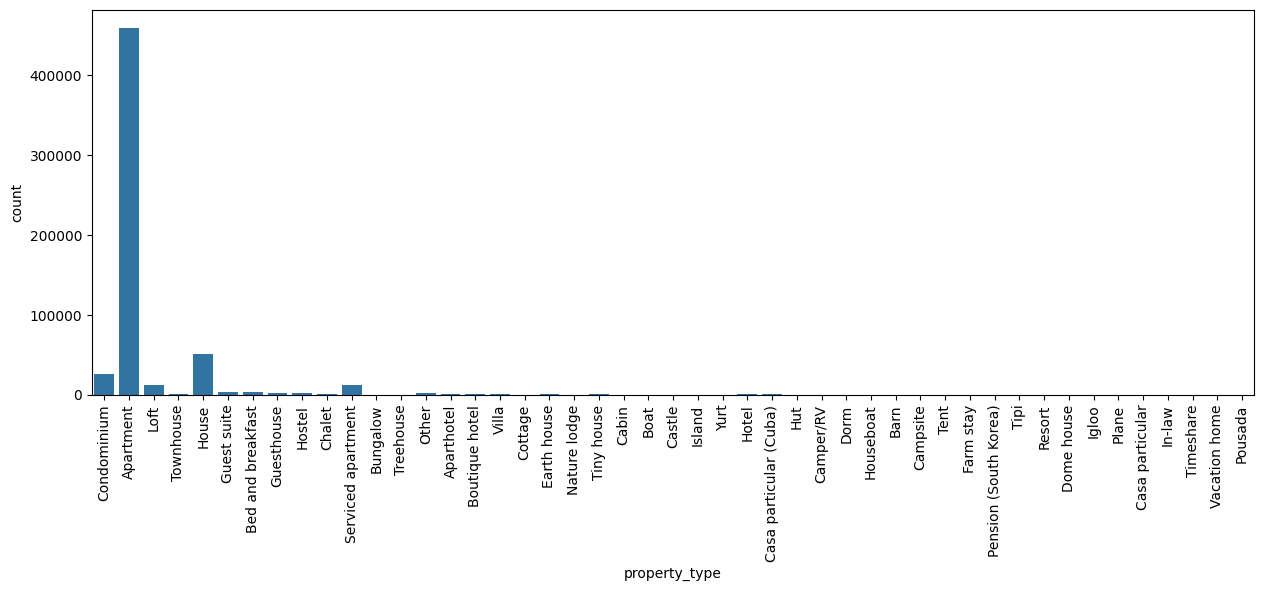

In [21]:
#print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis= 'x', rotation = 90)

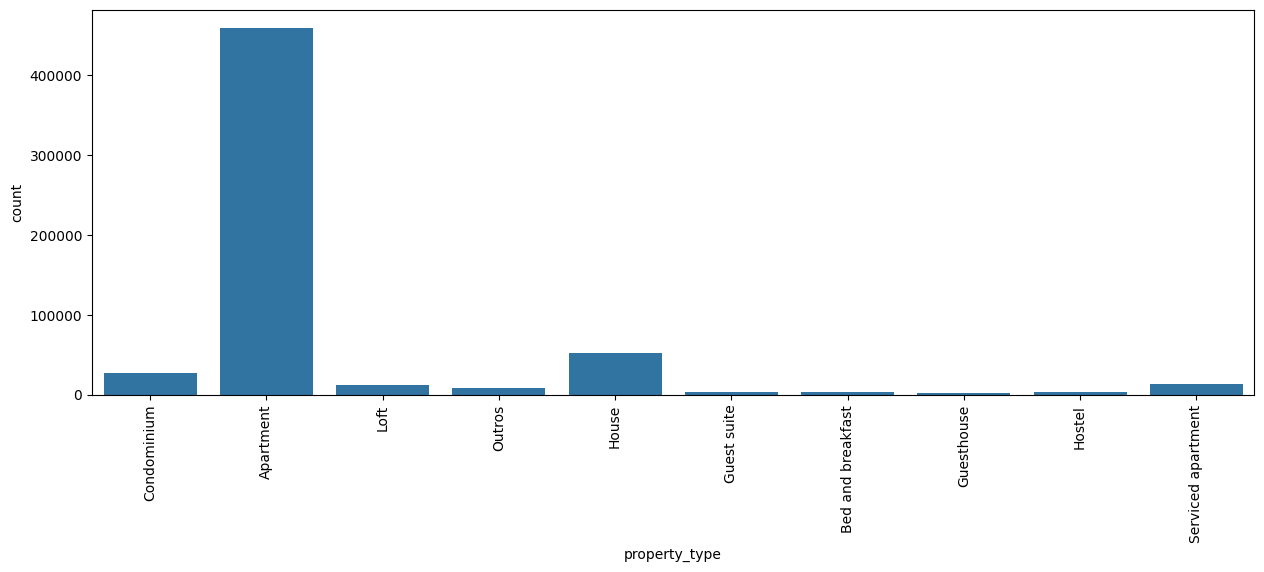

In [22]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)

#print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']== tipo, 'property_type'] = 'Outros'

#print(base_airbnb['property_type'].value_counts())


plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis= 'x', rotation = 90)


### room_type

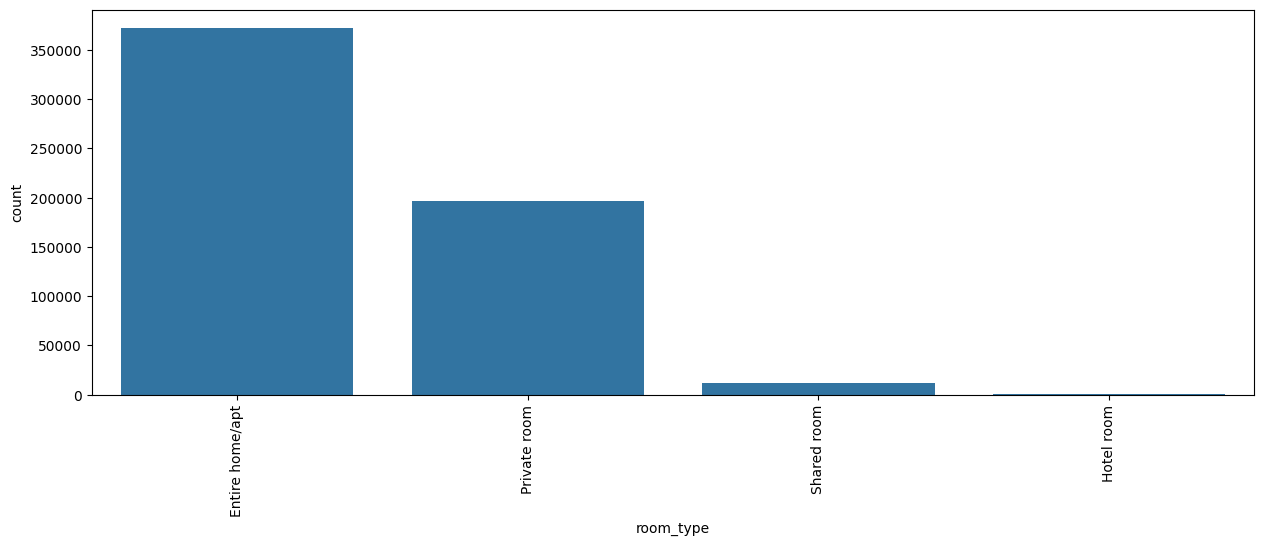

In [23]:
#print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='room_type', data=base_airbnb)
grafico.tick_params(axis= 'x', rotation = 90)

### bed_type

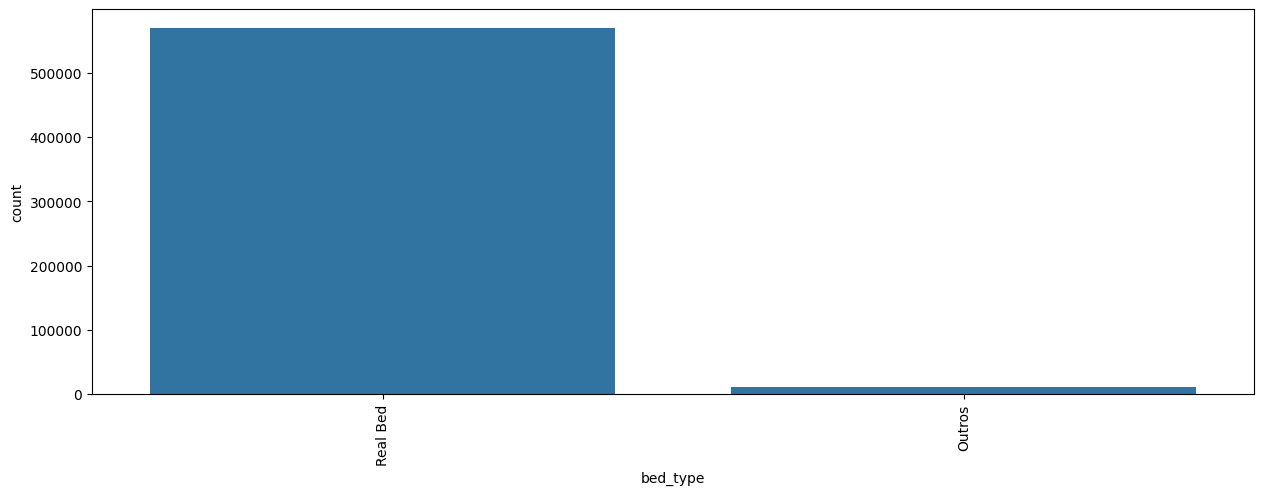

In [24]:
#print(base_airbnb['bed_type'].value_counts())

#plt.figure(figsize=(15,5))
#grafico = sns.countplot(x='bed_type', data=base_airbnb)
#grafico.tick_params(axis= 'x', rotation = 90)

# Agrupando categorias de bed_type

tabela_bed_type = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed_type.index:
    if tabela_bed_type[tipo] < 10000:
        colunas_agrupar.append(tipo)

#print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']== tipo, 'bed_type'] = 'Outros'

#print(base_airbnb['property_type'].value_counts())


plt.figure(figsize=(15,5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis= 'x', rotation = 90)

#print(base_airbnb['bed_type'].value_counts())

### cancellation_policy

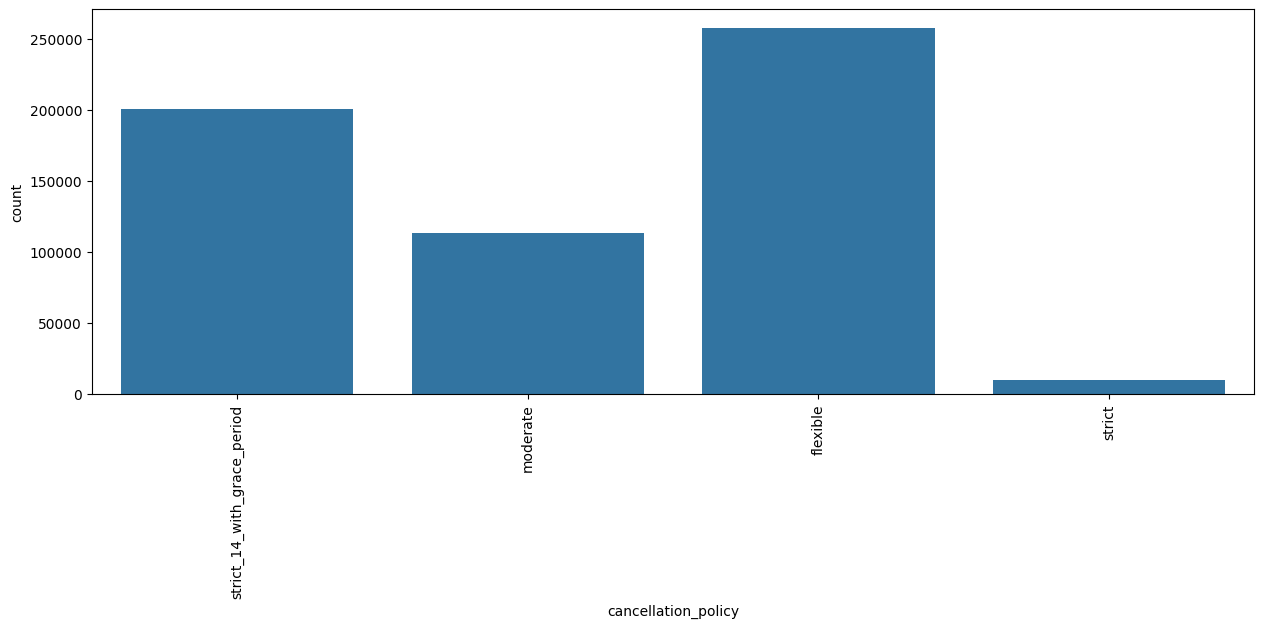

In [25]:
#print(base_airbnb['cancellation_policy'].value_counts())

#plt.figure(figsize=(15,5))
#grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
#grafico.tick_params(axis= 'x', rotation = 90)

#agrupando categorias de cancellation_policy 

tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)

#print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']== tipo, 'cancellation_policy'] = 'strict'

#print(base_airbnb['property_type'].value_counts())


plt.figure(figsize=(15,5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis= 'x', rotation = 90)

#print(base_airbnb['cancellation_policy'].value_counts())


### amenities

Como temos uma diversidade muito grande, as vezes, as mesmas amenities poderiam ser escritas de forma diferente. Portanto, irei avaliar a quantidade de amenities em cada airbnb para que eu possa usar essa coluna como parametro no modelo.

###

In [28]:
#print(base_airbnb['amenities'].iloc[0])


base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Smoking allowed",Doorman,Elevator,"Hot tub","Family/kid friendly","Suitable for events",Essentials,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Building staff","Private entrance","Hot water","Bed linens",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Patio or balcony","Luggage dropoff allowed"}


(581983, 20)